#Three texts has been saved in a folder named "Novels":

In [18]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5682-6DAE

 Directory of C:\Users\Papar

20/11/2017  02:30 PM    <DIR>          .
20/11/2017  02:30 PM    <DIR>          ..
15/09/2017  06:27 PM    <DIR>          .anaconda
15/11/2017  12:06 PM               559 .bash_profile
27/06/2017  10:01 AM    <DIR>          .cisco
12/10/2017  08:10 PM    <DIR>          .conda
20/11/2017  01:05 PM                43 .condarc
16/09/2017  02:31 PM                75 .coveragerc
16/09/2017  02:31 PM                87 .gitignore
19/11/2017  01:56 PM    <DIR>          .ipynb_checkpoints
18/09/2017  12:59 PM    <DIR>          .ipython
22/09/2017  09:25 AM    <DIR>          .jupyter
20/11/2017  12:01 PM    <DIR>          .matplotlib
22/05/2017  08:00 AM    <DIR>          .spss
14/11/2017  11:20 PM    <DIR>          .swc
16/09/2017  02:31 PM             1,836 .travis.yml
15/11/2017  03:53 PM             1,984 .viminfo
30/10/2017  09:37 AM                 0 1986.txt
21/10/2017  09:30 PM           312

In [19]:
directory = "Novels"

#Processing text files in Novels:

In [20]:
import glob, re, os, collections

docs = {}

for file in glob.glob(directory + "/*.txt"):
    
    with open(file, encoding="ISO-8859-1") as f:
        text = f.read();
        
        tokens = re.findall(r'\b\w[\w-]*\b', text.lower())
        count = len(tokens)
        
        relativefreqs = {}
        localfreqs = collections.Counter(tokens) 
        for word, wordcount in localfreqs.items():
            
            if word.isalpha():
                relativefreqs[word] = wordcount/count
            
        docs[os.path.basename(file)] = relativefreqs
        
print("Files processed: " + str(len(docs)))

Files processed: 3


#Data frame:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame(docs)
df.head(20)

,The church and society.txt,The mass and the masses.txt,The red festival.txt
a,0.020149,0.021811,0.013200
abandonment,0.000325,NaN,NaN
able,NaN,NaN,0.000528
ably,NaN,0.000235,NaN
abortifacients,0.000325,NaN,NaN
about,0.001950,0.000704,0.001584
above,0.000650,0.000235,NaN
absent,NaN,0.000235,NaN
absolute,NaN,0.000235,NaN
abstaining,0.000325,NaN,NaN


In [22]:
df.describe()

,The church and society.txt,The mass and the masses.txt,The red festival.txt
count,962.000000,1186.000000,645.000000
mean,0.001029,0.000840,0.001539
std,0.003943,0.004153,0.004450
min,0.000325,0.000235,0.000528
25%,0.000325,0.000235,0.000528
50%,0.000325,0.000235,0.000528
75%,0.000650,0.000469,0.001056
max,0.090348,0.108114,0.070222


#summed relative frequency:

In [23]:
df['Sum'] = df.sum(axis=1)
df.sort_values("Sum", ascending=False, inplace=True)
df[:20]

,The church and society.txt,The mass and the masses.txt,The red festival.txt,Sum
the,0.090348,0.108114,0.070222,0.268684
of,0.053949,0.066370,0.057022,0.177340
to,0.029899,0.022045,0.032207,0.084151
and,0.026974,0.023687,0.029039,0.079700
in,0.023399,0.029315,0.024287,0.077002
is,0.017550,0.029315,0.026399,0.073264
a,0.020149,0.021811,0.013200,0.055160
that,0.011050,0.011492,0.013728,0.036269
as,0.007475,0.013133,0.014256,0.034864
it,0.010075,0.011023,0.011088,0.032185


In [24]:
len(df)

2122

# Saving the table of frequencies into a CSV file:

In [25]:
FileName = "FrequenciesResultsShort.csv"
df.to_csv(FileName) 

In [26]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 5682-6DAE

 Directory of C:\Users\Papar

21/10/2017  09:30 PM           312,593 AdamSavageComments.csv
20/11/2017  02:31 PM           133,597 FrequenciesResultsShort.csv
20/11/2017  12:01 PM            87,468 FrequenciesResultsShortFlip.csv
16/10/2017  02:16 PM             2,372 RAW.csv
09/11/2017  05:56 PM                 0 testreview.csv
               5 File(s)        536,030 bytes
               0 Dir(s)  11,858,436,096 bytes free


In [27]:
import sys
print(sys.version)

3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]


In [28]:
import sys; print('{0[0]}.{0[1]}'.format(sys.version_info))

3.6


In [29]:
%%bash
head fileIwanttosee.txt

Couldn't find program: 'bash'


In [29]:
import pip

In [31]:
import sys,os,os.path
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['HSRL_INSTRUMENT']='gvhsrl'
os.environ['HSRL_CONFIG']=os.path.expanduser('~/hsrl_config')

In [32]:
# I installed MSYS

In [3]:
head -n3 FrequenciesResultsShort

SyntaxError: invalid syntax (<ipython-input-3-27bdda56fb76>, line 1)

In [13]:
!head

'head' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
%head

ERROR:root:Line magic function `%head` not found.


In [30]:
%alias head powershell -command "& {Get-Content %s -Head 3}"

In [ ]:
%head FrequenciesResultsShort.csv

In [24]:
# it seems that windows doesnt operate Unix commands!

In [25]:
# I really have no idea why it doesnt recognize"!head"?
# I tried to define Python path into the list of Environment Variables, still didnt work
# It has something related to the System Path, but couldnt sove it.

#Fliping the data frame:

In [31]:
df2 = df.transpose()
df2.head(20)

,the,of,to,and,in,is,a,that,as,it,...,factors,features,remember,familiar,false,failure,resemblance,reservation,faculty,label
The church and society.txt,0.090348,0.053949,0.029899,0.026974,0.023399,0.017550,0.020149,0.011050,0.007475,0.010075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The mass and the masses.txt,0.108114,0.066370,0.022045,0.023687,0.029315,0.029315,0.021811,0.011492,0.013133,0.011023,...,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235
The red festival.txt,0.070222,0.057022,0.032207,0.029039,0.024287,0.026399,0.013200,0.013728,0.014256,0.011088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sum,0.268684,0.177340,0.084151,0.079700,0.077002,0.073264,0.055160,0.036269,0.034864,0.032185,...,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235


In [32]:
df3 = df2.drop(['Sum'])
df3.head(18)

,the,of,to,and,in,is,a,that,as,it,...,factors,features,remember,familiar,false,failure,resemblance,reservation,faculty,label
The church and society.txt,0.090348,0.053949,0.029899,0.026974,0.023399,0.017550,0.020149,0.011050,0.007475,0.010075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The mass and the masses.txt,0.108114,0.066370,0.022045,0.023687,0.029315,0.029315,0.021811,0.011492,0.013133,0.011023,...,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235
The red festival.txt,0.070222,0.057022,0.032207,0.029039,0.024287,0.026399,0.013200,0.013728,0.014256,0.011088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Saving the fliped data frame into a csv file:

In [34]:
FileName = "FrequenciesResultsShortFlip.csv"
df3.to_csv(FileName, na_rep=0)

#Texts without sum row:

In [35]:
df3 = df2.drop(['Sum'])
df3.head(18)

,the,of,to,and,in,is,a,that,as,it,...,factors,features,remember,familiar,false,failure,resemblance,reservation,faculty,label
The church and society.txt,0.090348,0.053949,0.029899,0.026974,0.023399,0.017550,0.020149,0.011050,0.007475,0.010075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The mass and the masses.txt,0.108114,0.066370,0.022045,0.023687,0.029315,0.029315,0.021811,0.011492,0.013133,0.011023,...,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235
The red festival.txt,0.070222,0.057022,0.032207,0.029039,0.024287,0.026399,0.013200,0.013728,0.014256,0.011088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


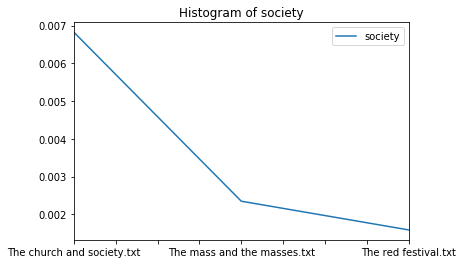

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word2Plot = "society"

plt.figure(figsize=(3, 3))

df3[[word2Plot]].plot()
plt.title('Histogram of ' + word2Plot)
plt.show()

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
ls Frequencies*.csv

 Volume in drive C has no label.
 Volume Serial Number is 5682-6DAE

 Directory of C:\Users\Papar

20/11/2017  02:31 PM           133,597 FrequenciesResultsShort.csv
20/11/2017  02:32 PM            87,468 FrequenciesResultsShortFlip.csv
               2 File(s)        221,065 bytes
               0 Dir(s)  11,857,371,136 bytes free


#How to read a csv file:

In [8]:
df = pd.read_csv('FrequenciesResultsShortFlip.csv' , encoding="utf-8")
df.rename(columns={'Unnamed: 0': 'Text'}, inplace=True)
df.head(10)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data

In [ ]:
#I needed to change 'utf-8' codec to "latin1":

In [39]:
df = pd.read_csv('FrequenciesResultsShortFlip.csv' , encoding="latin1")
df.rename(columns={'Unnamed: 0': 'Text'}, inplace=True)
df.head(10)

,Text,the,of,to,and,in,is,a,that,as,...,factors,features,remember,familiar,false,failure,resemblance,reservation,faculty,label
0,The church and society.txt,0.090348,0.053949,0.029899,0.026974,0.023399,0.017550,0.020149,0.011050,0.007475,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,The mass and the masses.txt,0.108114,0.066370,0.022045,0.023687,0.029315,0.029315,0.021811,0.011492,0.013133,...,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235
2,The red festival.txt,0.070222,0.057022,0.032207,0.029039,0.024287,0.026399,0.013200,0.013728,0.014256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
# same thing is happening here for the "head"!

In [27]:
# "df" is not changed, so from now on these codes seem to be useless!

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 2123 entries, Text to label
dtypes: float64(2122), object(1)
memory usage: 49.8+ KB


In [41]:
df.describe()

,the,of,to,and,in,is,a,that,as,it,...,factors,features,remember,familiar,false,failure,resemblance,reservation,faculty,label
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.089561,0.059113,0.028050,0.026567,0.025667,0.024421,0.018387,0.012090,0.011621,0.010728,...,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078
std,0.018959,0.006469,0.005327,0.002699,0.003190,0.006127,0.004568,0.001436,0.003634,0.000567,...,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135
min,0.070222,0.053949,0.022045,0.023687,0.023399,0.017550,0.013200,0.011050,0.007475,0.010075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080285,0.055485,0.025972,0.025331,0.023843,0.021974,0.016675,0.011271,0.010304,0.010549,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.090348,0.057022,0.029899,0.026974,0.024287,0.026399,0.020149,0.011492,0.013133,0.011023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.099231,0.061696,0.031053,0.028007,0.026801,0.027857,0.020980,0.012610,0.013694,0.011055,...,0.000117,0.000117,0.000117,0.000117,0.000117,0.000117,0.000117,0.000117,0.000117,0.000117
max,0.108114,0.066370,0.032207,0.029039,0.029315,0.029315,0.021811,0.013728,0.014256,0.011088,...,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235,0.000235


In [15]:
print(list(df.columns.values))

['Text', 'the', 'of', 'to', 'and', 'in', 'is', 'a', 'that', 'as', 'it', 'for', 'we', 'be', 'are', 'was', 'not', 'god', 'all', 'his', 'there', 'life', 'by', 'but', 'which', 'with', 'this', 'from', 'spirit', 'church', 'no', 'â', 'an', 'our', 'mass', 'fellowship', 'he', 'can', 'on', 'world', 'or', 'society', 'one', 'have', 'its', 'may', 'at', 'has', 'new', 'than', 'social', 'christian', 'christ', 'man', 'who', 'what', 'us', 'holy', 's', 'so', 'into', 'men', 'more', 'only', 'were', 'they', 'every', 'human', 'their', 'if', 'faith', 'would', 'today', 'these', 'will', 'those', 'christians', 'fact', 'cannot', 'common', 'group', 'another', 'up', 'most', 'action', 'way', 'must', 'whole', 'christianity', 'do', 'about', 'love', 'before', 'say', 'work', 'even', 'him', 'then', 'see', 'you', 'religion', 'children', 'family', 'well', 'without', 'been', 'just', 'some', 'had', 'modern', 'corporate', 'sacrifice', 'communion', 'understanding', 'when', 'time', 'meaning', 'such', 'any', 'living', 'great', '

In [42]:
len(list(df.columns.values))

2123

Text(0.5,1,'Histogram')

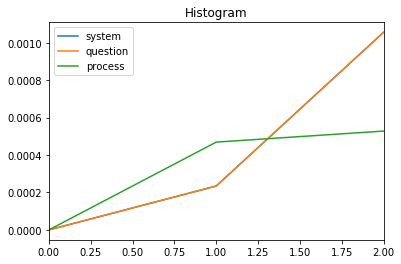

In [43]:
df[['system','question','process']].plot()
plt.title('Histogram')

In [34]:
#KeyError: "['society' 'mass' 'festival'] not in index" which makes sense due to the prior error

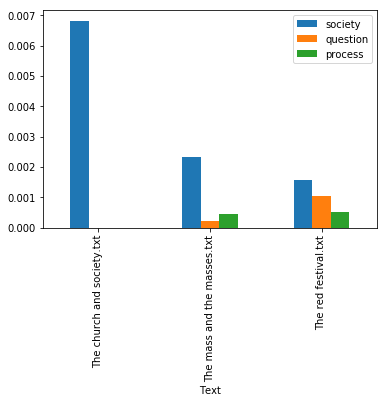

In [46]:
indexed_df = df.set_index(['Text'])
my_plot = indexed_df[['society','question','process']].plot(kind='bar')

In [47]:
howManyComps = 4

listOfWords = ['intelligence','possible','support','information','declassify','customer','consent']

from sklearn.decomposition import PCA

df2 = df.ix[1:,listOfWords] 

pca = PCA(n_components=howManyComps)
pca.fit(df2) 

X = pca.transform(df2)

print("Done")

C:\Users\Papar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [48]:
print(pca.explained_variance_ratio_)
type(pca.explained_variance_ratio_)

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'